In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor,XGBClassifier
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data.csv')
display(df.head())
display(df.tail())
df.shape
df.info()
df.describe()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [3]:
parts=df['date'].str.split('-',n=3,expand=True)
df['year']=parts[0].astype('int')
df['month']=parts[1].astype('int')
df['day']=parts[2].astype('int')
df.head()

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


In [4]:
df

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27
912996,2017-12-28,10,50,59,2017,12,28
912997,2017-12-29,10,50,74,2017,12,29
912998,2017-12-30,10,50,62,2017,12,30


In [5]:
from datetime import date
import holidays
indian_holidays=holidays.country_holidays('IN')
df['holidays']=df['date'].apply(lambda x: 1 if indian_holidays.get(x) else 0)

In [6]:
df['m1']=np.sin(df['month'] * (2*np.pi/12))
df['m2']=np.cos(df['month'] * (2*np.pi/12))
df.head()

,date,store,item,sales,year,month,day,holidays,m1,m2
0,2013-01-01,1,1,13,2013,1,1,0,0.5,0.866025
1,2013-01-02,1,1,11,2013,1,2,0,0.5,0.866025
2,2013-01-03,1,1,14,2013,1,3,0,0.5,0.866025
3,2013-01-04,1,1,13,2013,1,4,0,0.5,0.866025
4,2013-01-05,1,1,10,2013,1,5,0,0.5,0.866025


In [7]:
# Day starting from 0(zero)
#How weekday function from datetime work 
year=2025
month=5
day=1
def weekday_or_weekend(year,month,day):
    d=datetime(year,month,day)
    
    return d.weekday()
b=weekday_or_weekend(year,month,day)
print(b)

   


3


In [8]:
def weekday_or_weekend(year,month,day):
    d=datetime(year,month,day)
    return 1 if d.weekday()>4 else 0

df['weekday']=df.apply(lambda x: weekday_or_weekend(x['year'],x['month'],x['day']),axis=1)




In [9]:
df

,date,store,item,sales,year,month,day,holidays,m1,m2,weekday
0,2013-01-01,1,1,13,2013,1,1,0,5.000000e-01,0.866025,0
1,2013-01-02,1,1,11,2013,1,2,0,5.000000e-01,0.866025,0
2,2013-01-03,1,1,14,2013,1,3,0,5.000000e-01,0.866025,0
3,2013-01-04,1,1,13,2013,1,4,0,5.000000e-01,0.866025,0
4,2013-01-05,1,1,10,2013,1,5,0,5.000000e-01,0.866025,1
...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27,0,-2.449294e-16,1.000000,0
912996,2017-12-28,10,50,59,2017,12,28,0,-2.449294e-16,1.000000,0
912997,2017-12-29,10,50,74,2017,12,29,0,-2.449294e-16,1.000000,0
912998,2017-12-30,10,50,62,2017,12,30,0,-2.449294e-16,1.000000,1


In [10]:
!pip install holidays



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
df.drop('date',axis=1,inplace=True)

In [12]:
#Now let's check the unique values in the store and item column using nunique().
df['store'].nunique(),df['item'].nunique()

(10, 50)

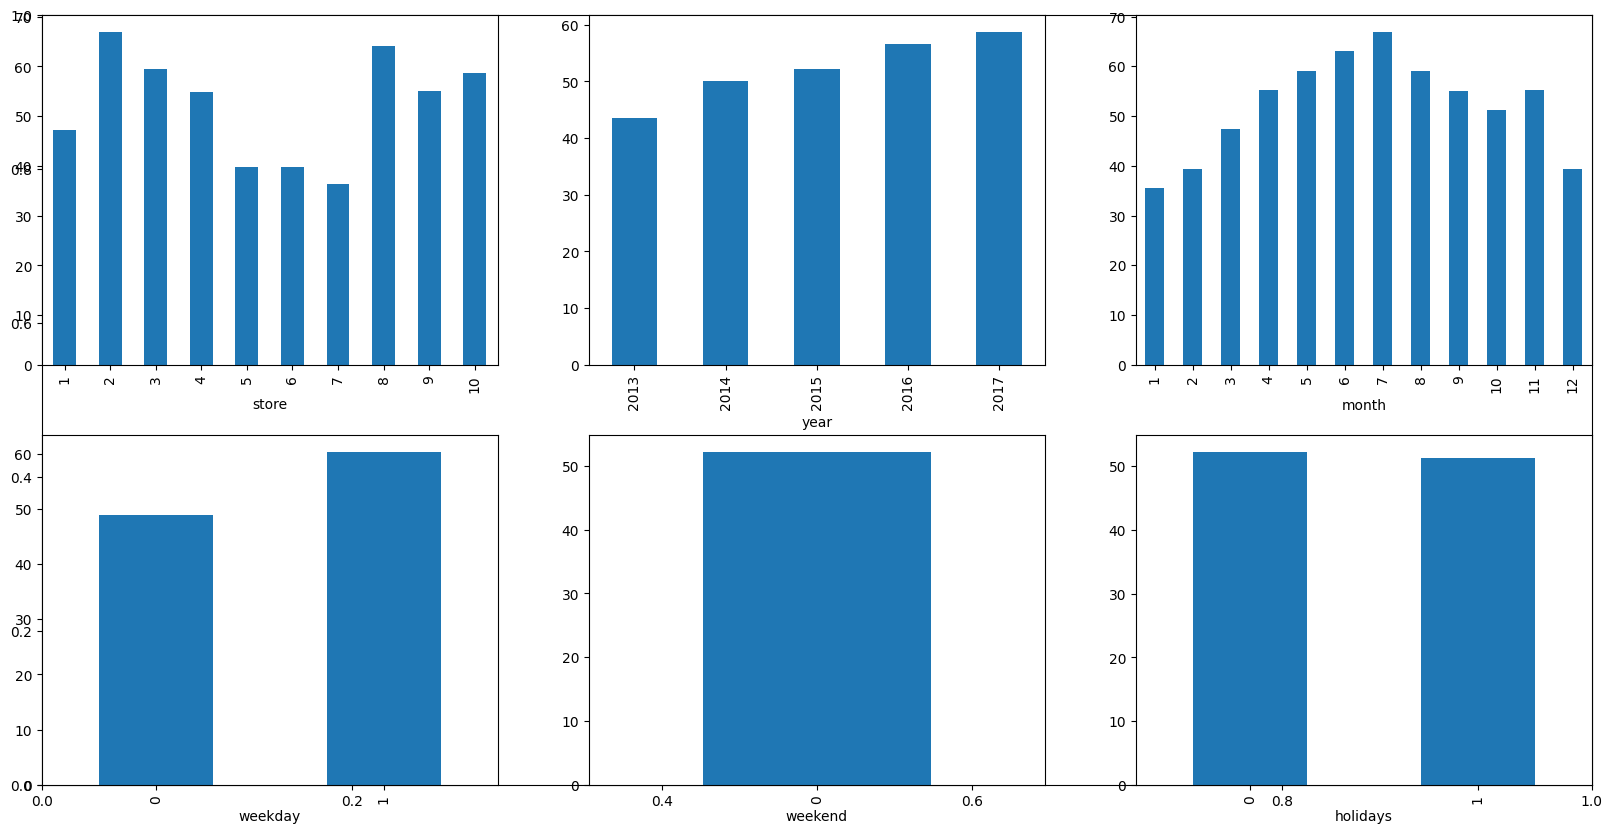

In [13]:
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
features=['store','year','month','weekday','weekend','holidays']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
     plt.subplot(2,3,i+1)
     df.groupby(col).mean()['sales'].plot.bar()
plt.show()




0 store
1 year
2 month
3 day
4 weekday
5 weekend
6 holidays


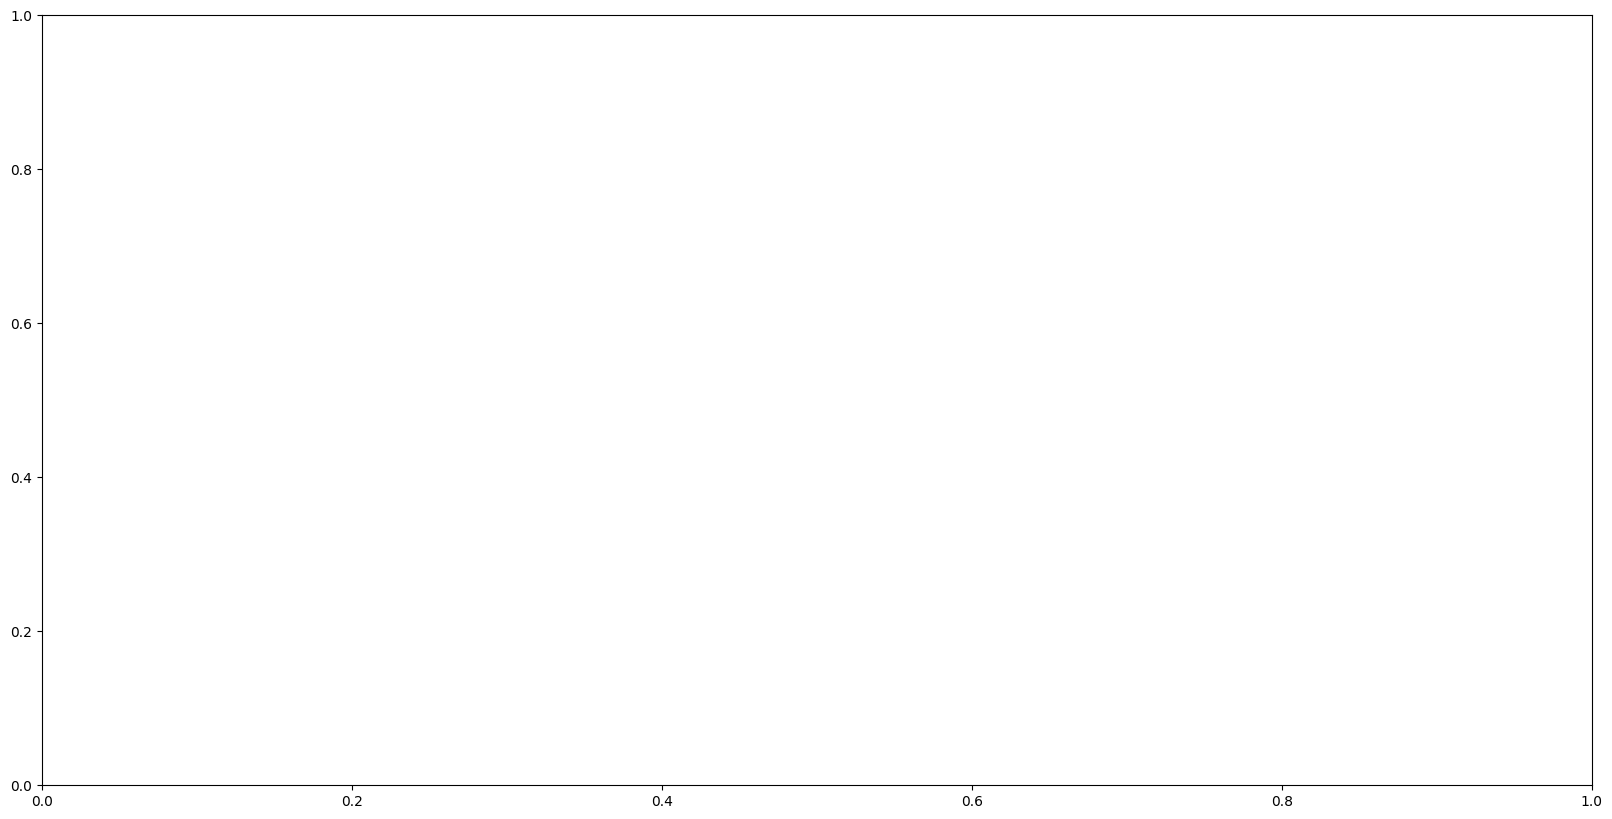

In [14]:
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
features=['store','year','month','day','weekday','weekend','holidays']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    print(i,col)


In [15]:
df

,store,item,sales,year,month,day,holidays,m1,m2,weekday,weekend
0,1,1,13,2013,1,1,0,5.000000e-01,0.866025,0,0
1,1,1,11,2013,1,2,0,5.000000e-01,0.866025,0,0
2,1,1,14,2013,1,3,0,5.000000e-01,0.866025,0,0
3,1,1,13,2013,1,4,0,5.000000e-01,0.866025,0,0
4,1,1,10,2013,1,5,0,5.000000e-01,0.866025,1,0
...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,63,2017,12,27,0,-2.449294e-16,1.000000,0,0
912996,10,50,59,2017,12,28,0,-2.449294e-16,1.000000,0,0
912997,10,50,74,2017,12,29,0,-2.449294e-16,1.000000,0,0
912998,10,50,62,2017,12,30,0,-2.449294e-16,1.000000,1,0


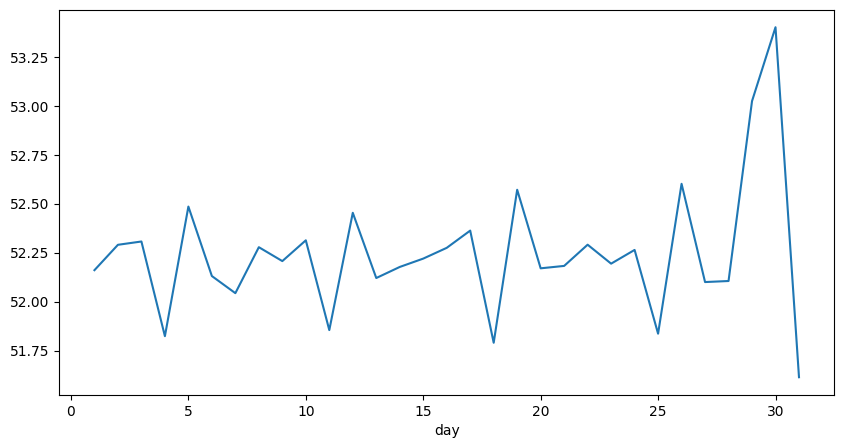

In [16]:
plt.figure(figsize=(10,5))
df.groupby('day').mean()['sales'].plot()
plt.show() 

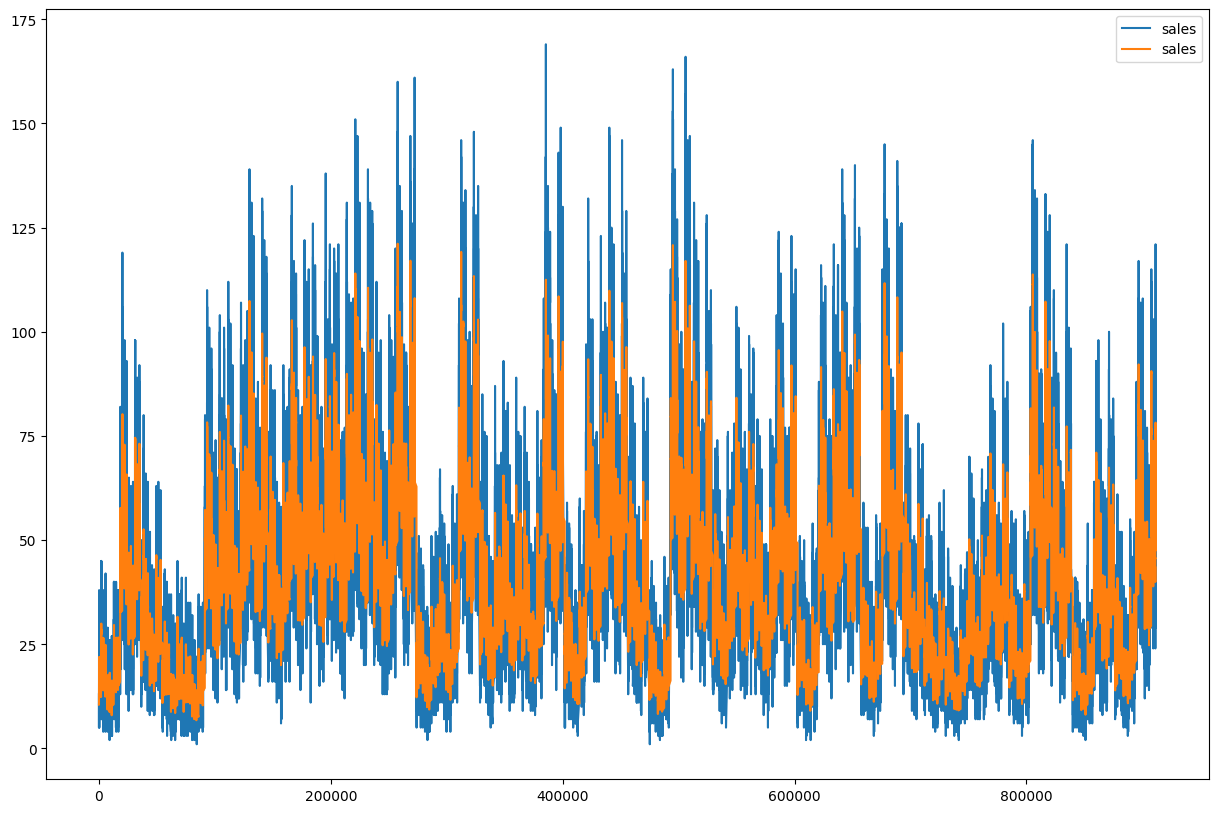

In [17]:
plt.figure(figsize=(15,10))
windows_size= 30
data=df[df['year']==2013]
windows=data['sales'].rolling(windows_size)
sma=windows.mean()
sma=sma[windows_size - 1:]
data['sales'].plot()
sma.plot()
plt.legend()
plt.show()

In [18]:
print(sma)

29        10.500000
30        10.500000
31        10.500000
32        10.733333
33        10.800000
            ...    
911534    50.000000
911535    49.600000
911536    49.466667
911537    48.500000
911538    47.600000
Name: sales, Length: 182471, dtype: float64


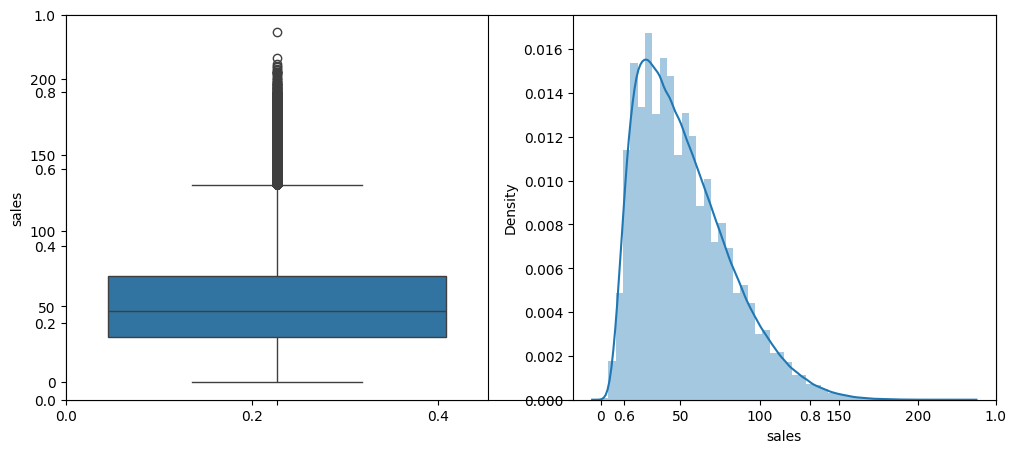

In [19]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,2)
sb.distplot(df['sales'])

plt.subplot(1,2,1)
sb.boxplot(df['sales'])
plt.show()


In [20]:
df['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

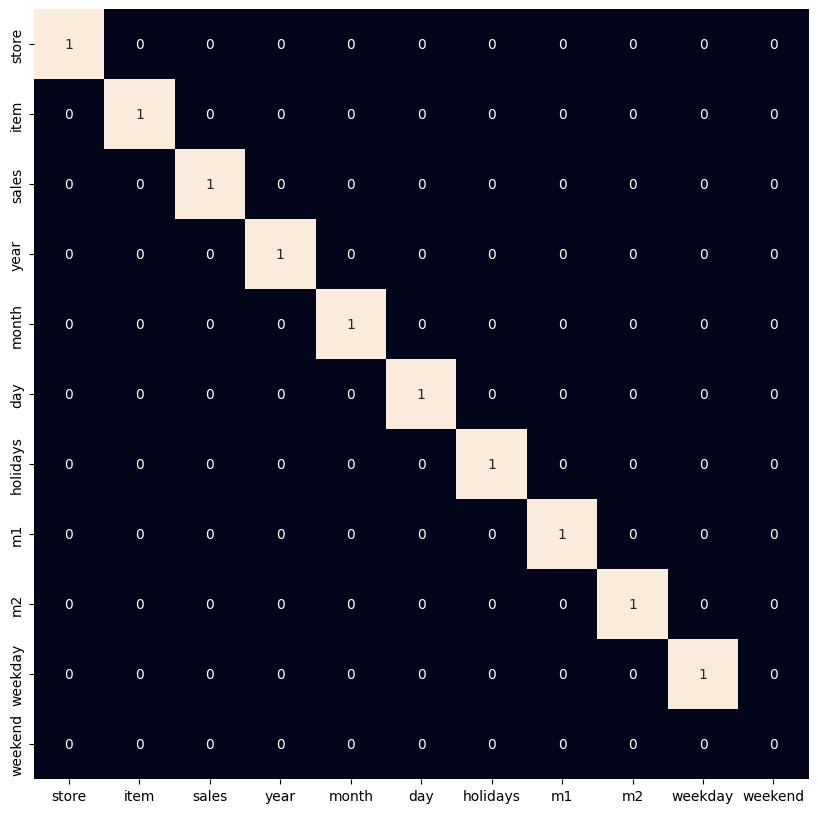

In [21]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()> 0.8,
           annot=True,
           cbar=False)
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   store     913000 non-null  int64  
 1   item      913000 non-null  int64  
 2   sales     913000 non-null  int64  
 3   year      913000 non-null  int64  
 4   month     913000 non-null  int64  
 5   day       913000 non-null  int64  
 6   holidays  913000 non-null  int64  
 7   m1        913000 non-null  float64
 8   m2        913000 non-null  float64
 9   weekday   913000 non-null  int64  
 10  weekend   913000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 76.6 MB


In [23]:
df=df[df['sales']<140]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906495 entries, 0 to 912999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   store     906495 non-null  int64  
 1   item      906495 non-null  int64  
 2   sales     906495 non-null  int64  
 3   year      906495 non-null  int64  
 4   month     906495 non-null  int64  
 5   day       906495 non-null  int64  
 6   holidays  906495 non-null  int64  
 7   m1        906495 non-null  float64
 8   m2        906495 non-null  float64
 9   weekday   906495 non-null  int64  
 10  weekend   906495 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 83.0 MB


In [25]:
features=df.drop(['sales','year'],axis=1)
target=df['sales'].values

X_train, X_val, Y_train, Y_val  =  train_test_split(features,target,test_size=0.020,random_state=82)



In [26]:
X_train.shape,Y_train.shape


((888365, 9), (888365,))

In [27]:
X_val.shape,Y_val.shape

((18130, 9), (18130,))

In [28]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [29]:
X_train.shape,Y_train.shape

((888365, 9), (888365,))

In [31]:
models=[LinearRegression(),XGBRegressor(),Lasso(),Ridge()]
for i in range(4):
         models[i].fit(X_train,Y_train)
         print(f'{models[i]} :')
         train_preds=models[i].predict(X_train)
         print('training error:', mae(Y_train,train_preds))

         val_preds=models[i].predict(X_val)
         print('validation error:', mae(Y_val,val_preds))
         print()

LinearRegression() :
training error: 21.099906936803162
validation error: 21.26184262587842

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) :
training error: 7.686387538909912
validation error: 7.694303512573242

Lasso() :
training error: 21.213562987585735
validation error: 21.361999350885682

R

In [42]:
model = XGBClassifier()
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(Y_val, y_pred)  # For classification
# mse = mean_squared_error(y_test, y_pred) # For regression
print(f"Accuracy: {accuracy}")
# print(f"Mean Squared Error: {mse}")


NotFittedError: need to call fit or load_model beforehand